In [2]:
!pip install arviz
import arviz as az
import matplotlib.pyplot as plt
import numpy as np

In [3]:
%config InlineBackend.figure_format = 'retina'
# Initialize random number generator
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

In [5]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
### independent variables
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

### dependent variable
#y= 1+1*x1+2.5*x2+np.random.randn(100)*1

### x1 and x2 
### model will try to find alpha, beta and sigma 
# Simulate outcome variable
Y = alpha + beta[0] * X1 + beta[1] * X2 + np.random.randn(size) * sigma

In [14]:
Y

array([-8.47192515e-01, -4.61887339e-01,  4.08098273e+00,  3.19816833e+00,
        2.20564720e+00, -5.78120758e-01,  7.72394654e-01,  8.89882760e-01,
        2.17377116e+00,  2.81507031e+00,  7.23287642e-01,  3.34790429e-02,
        4.24195859e-01,  6.26627830e-01,  2.05208846e+00,  1.95231520e+00,
       -1.92459801e+00, -1.72902946e-01,  4.59366868e-01,  6.61207238e-01,
       -1.15283906e+00,  1.35693693e+00,  1.34084857e+00,  2.21385549e+00,
       -2.35333054e+00,  9.81195877e-01,  7.32351037e-01,  1.45474461e+00,
        6.89911341e-01,  2.36684736e+00,  2.03360620e+00,  5.95788315e-01,
       -1.23598057e+00,  2.53991871e+00, -1.16458021e-01,  1.29187596e+00,
        1.81949176e-01, -1.14798152e+00,  1.41224152e+00,  6.06160979e-01,
       -1.05321020e+00,  4.48281908e-04,  2.49330148e+00, -1.16521511e+00,
        2.37139194e-01, -9.53500492e-01,  2.66964491e+00,  2.39852216e+00,
        5.74464561e-01,  5.28122789e-01,  8.00387748e-01,  1.90287957e+00,
        1.81489040e+00,  

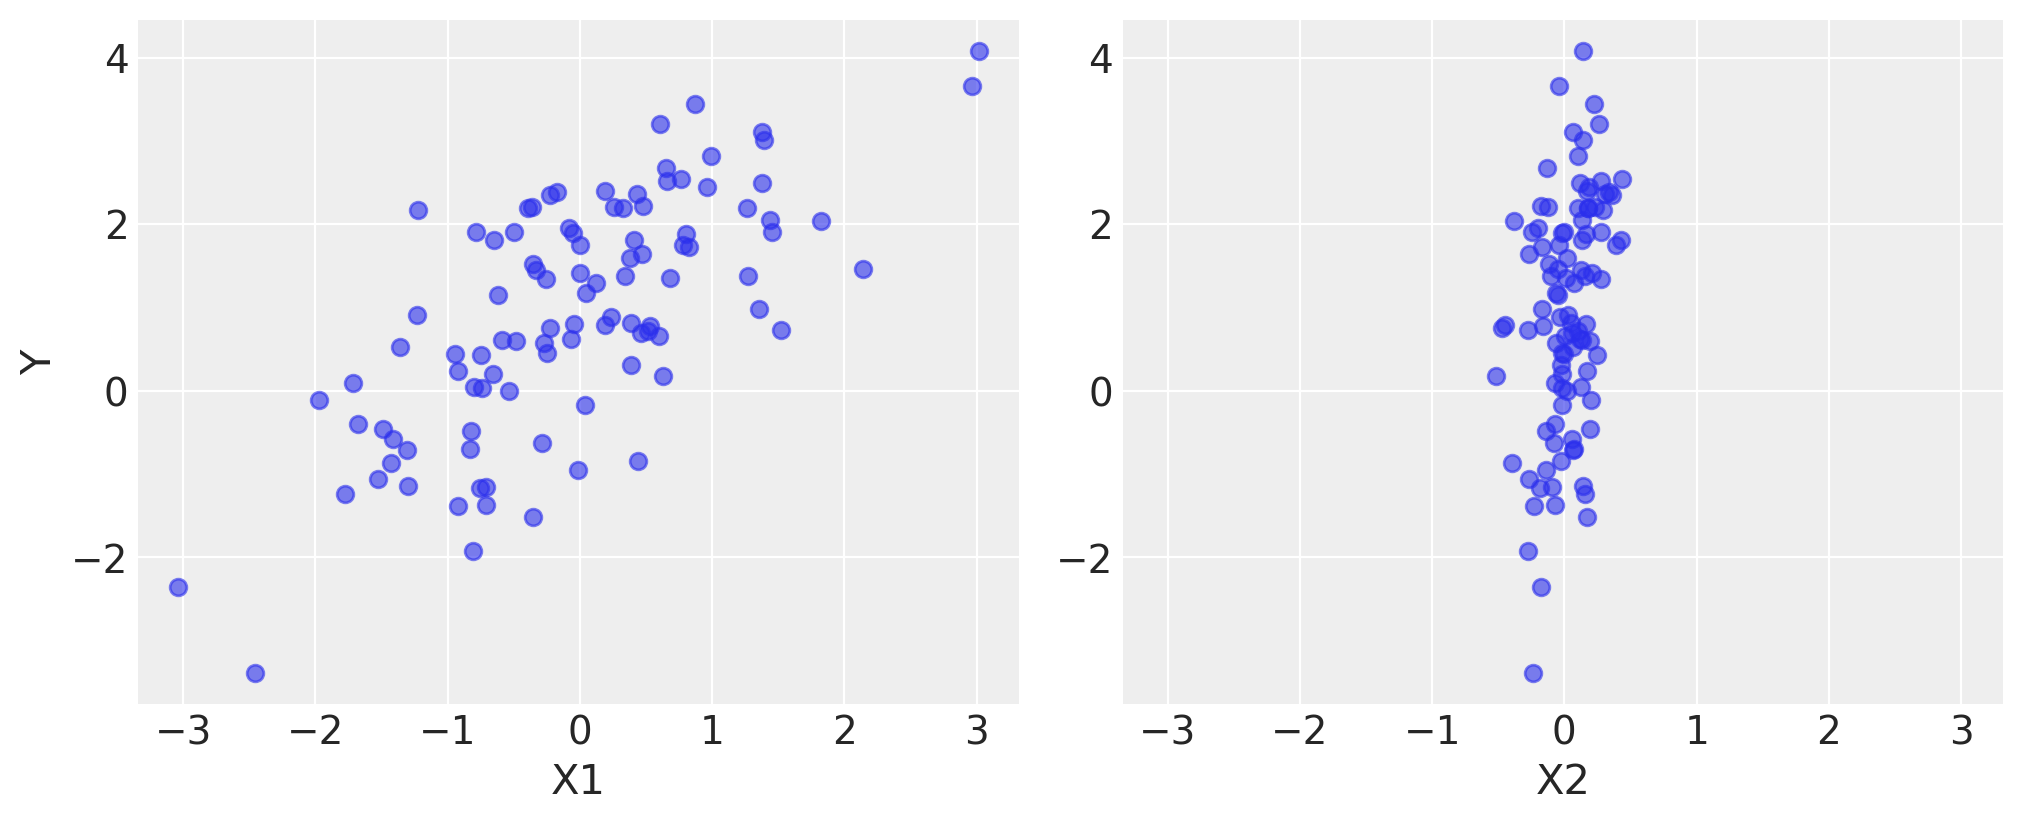

In [6]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10, 4))
axes[0].scatter(X1, Y, alpha=0.6)
axes[1].scatter(X2, Y, alpha=0.6)
axes[0].set_ylabel("Y")
axes[0].set_xlabel("X1")
axes[1].set_xlabel("X2");

In [9]:
!pip3 install pymc3

  Created wheel for theano-pymc: filename=Theano_PyMC-1.1.2-py3-none-any.whl size=1529958 sha256=0e0727b380b4f5d705de2bd644907faefe697cb1485309db380492a69d55d21e
  Stored in directory: c:\users\14373\appdata\local\pip\cache\wheels\0e\41\d2\82c7b771236f987def7fe2e51855cce22b270327f3fedec57c
Successfully built theano-pymc


In [10]:
import sys
print(sys.executable)

import pymc3 as pm

print(f"Running on PyMC3 v{pm.__version__}")

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


E:\anaconda\python.exe
Running on PyMC3 v3.11.4


In [16]:
basic_model = pm.Model()

with basic_model:

    # Priors for unknown model parameters
    alpha = pm.Normal("alpha", mu=0, sigma=10)
    beta = pm.Normal("beta", mu=0, sigma=10, shape=2)
    sigma = pm.HalfNormal("sigma", sigma=1)

    # Expected value of outcome
    mu = alpha + beta[0] * X1 + beta[1] * X2

    # Likelihood (sampling distribution) of observations
    Y_obs = pm.Normal("Y_obs", mu=mu, sigma=sigma, observed=Y)

In [17]:
map_estimate = pm.find_MAP(model=basic_model)
map_estimate

E:\anaconda\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: divide by zero encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
E:\anaconda\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in multiply
  variables = ufunc(*ufunc_args, **ufunc_kwargs)
E:\anaconda\lib\site-packages\theano\tensor\elemwise.py:826: RuntimeWarning: invalid value encountered in log
  variables = ufunc(*ufunc_args, **ufunc_kwargs)


{'alpha': array(0.9235218),
 'beta': array([0.93756468, 2.50005318]),
 'sigma_log__': array(-0.14818009),
 'sigma': array(0.86227581)}

In [18]:
map_estimate = pm.find_MAP(model=basic_model, method="powell")
map_estimate

E:\anaconda\lib\site-packages\scipy\optimize\_minimize.py:519: RuntimeWarning: Method powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,


{'alpha': array(0.92351625),
 'beta': array([0.93751475, 2.50022666]),
 'sigma_log__': array(-0.14815448),
 'sigma': array(0.8622979)}